## 선형대수 기초개념

### 데이터의 유형
- 스칼라(Scalar) : 숫자 하나로 이루어진 데이터
- 벡터(Vector) : 여러개의 숫자가 특정 순서로 모여있는 데이터 하나를 의미 ex) x(철수) : [철수의 몸무게, 철수의 키, 철수의 성별,......]
    - 특정 철수라는 데이터 하나(x)는 몸무게, 키, 성별 등 특징을 가진다. --> 철수라는 데이터 하나, 특징의 갯수 = 차원의 수
    - 즉, 위 예시는 3차원 벡터이다.
    - 위의 예시는 행벡터(Row vector)로 표현되었지만, 기본적으로 vector는 열벡터(Colum vector)를 말하기 때문에 '|'형태로 나열된다.
    - 열 갯수가 1개인 행렬이라 할 수 있다.
    
- 행렬(Matrix) : 여러 데이터가 합쳐저 쌓여있는 형태 

In [2]:
%matplotlib inline

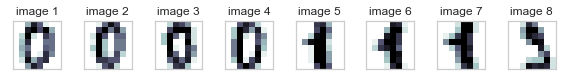

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
samples = [0, 10, 20, 30, 1, 11, 21, 31]
d = []
for i in range(8):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i + 1))
plt.tight_layout()
plt.show()

위의 이미지를 1열로 쫙 펴면 아래와 같다.

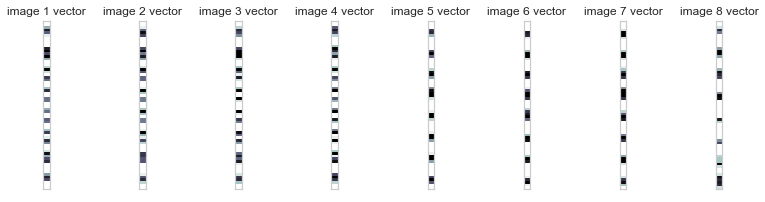

In [6]:
v = []
for i in range(8):
    v.append(d[i].reshape(64, 1)) # reshape으로 한줄로 펴준다.
    
plt.figure(figsize=(10, 8))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i], aspect=0.4,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {} vector".format(i + 1))
plt.tight_layout(w_pad=7)
plt.show()

해당 이미지의 특징들의 값을 한줄로 쭉 펼친 것이다.

### Linear Combination(선형 조합) 과 내적(inner Product, dot product)
: 선형조합은 벡터/행렬에 다음처럼 스칼라 값을 곱한 후 더하거나 뺀 것을 말한다. <br>
: 벡터의 선형조합의 경우, 내적의 형태로 표현이 가능하다. <br>
: 벡터간 내적이 가능하려면, 두 벡터의 길이가 같아야하고 <br>
: 앞 벡터는 행벡터(Transpose 형태), 뒷 벡터는 열벡터여야한다.<br>
: 이렇게 되면, 두 벡터 내적의 결과는 스칼라 값이 나온다. <br>
: `- x |`형태의 내적 결과는 스칼라, `| x -`형태의 내적 결과는 행렬이 된다.

In [19]:
# 2차원 배열로 표시된 벡터의 내적
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])
np.dot(x.T, y) # Transpose를 해줘야한다.

array([[32]])

In [21]:
# 1차원 배열로 표시된 벡터의 내적
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
np.dot(x, y) # 앞의 벡터 x를 행벡터로 가정한다. Transpose할 필요가 없다.

32

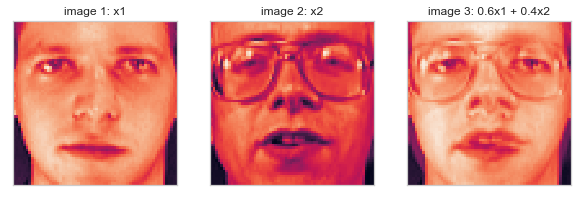

In [16]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3,figsize=(10,5))
ax[0].imshow(faces.images[0])
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: x1")
ax[1].imshow(faces.images[10])
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: x2")
ax[2].imshow(0.6 * faces.images[0] + 0.4 * faces.images[10])
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: 0.6x1 + 0.4x2")
plt.show()

image1, image2 두 이미지의 선형조합($x_3 = 0.6*x_1 + 0.4*x_2$)으로 만들어진 이미지 image3

### 잔차(Residual)와 이차형식(Quadratic Form)

: 선형 회귀 분석(linear regression)을 한 결과로 나온 예측치 : $w^Tx_i$와 실제값 ($y_i$)의 차이를 잔차(Residual) 혹은 오차(error)라고 한다.<br>
: 이를 $e_i$로 표기한다.$$e_i = y_i - \hat{y}_i = y_i - w^Tx_i$$

##### 잔차제곱합(RSS : Residual Sum of Squares)
$$\sum_{i=1}^N e^2_i = \sum_{i=1}^N (y_i - w^Tx_i)^2$$
$$e^Te = (y_i - Xw)^T (y_i - Xw)$$ <br>
$$x_i\text{라는 벡터가 N개 있는 것은 행렬 X와 같기때문에 이와같이 표현됨.}$$

##### 이차형식(Quadratic Form)
: 잔차제곱합(RSS) $e^Te = (y_i - Xw)^T (y_i - Xw)$를 전개하면 다음과 같다. <br>
: $$y^Ty - w^TX^Ty - y^TXw + w^TX^TXw$$ <br>
: 이때 마지막 $w^TX^TXw$에서 $X^TX$는 정방행렬이 된다. 이를 행렬$A$로 놓으면,<br>
$$w^TAw$$ <br>
: **행벡터 x 정방행렬 x 열벡터 형태가 되는데, 이를 이차형식(Quadratic Form)이라 한다.**